<a href="https://colab.research.google.com/github/luis314159/luis314159.github.io/blob/master/Reconstrucci%C3%B3n_de_se%C3%B1al_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<center>Universidad Autónoma de Chihuahua**

<div align= "center">
<img src="https://uach.mx/assets/media/snippet/62/escudo-web-header-black.svg" width="350" height="350" />

</div>
<div align ="center">
<img src="https://cimav.edu.mx/wp-content/uploads/2017/05/ingenieria-uach.png" width="200" height="200" />
</div>

##<center>Maestría en ingeniería en computación 
##<center>Procesamiento de señales
##<center>Trabajo: Reconstrución de señales por interpolación 
###<center>Catedratico: Dr. Alain Manzo Martínez 
###<center>Estudiante:Ing. Luis Ángel Almazán López</center>
<!-- badges: start -->
[![@luis3.14159](https://img.shields.io/badge/@luis314159-gitHub-darkred?&logoColor=white)](https://github.com/luis314159/) 
[![Platzi](https://img.shields.io/badge/Platzi_count-luisangelalmaznlpez-green&logoColor=white)](https://platzi.com/p/luisangelalmaznlpez/)
![Email](https://img.shields.io/badge/email-p364977@uach.mx-darkblue?&logoColor=white)
<!-- badges: end -->

In [7]:
#Importar librerías a utilizar 

from scipy.interpolate import InterpolatedUnivariateSpline
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import barycentric_interpolate




In [8]:
""" Se genera x(t) apartir de la suma de 3 funciones senoidales
frecuencia en hz de la senoide 1 """
#frecuencia en hz de la senoide 1
f1=15 
#frecuencia en hz de la senoide 2
f2=45
#frecuencia en hz de la senoide 3
f3=120

In [9]:
#Ancho de banda  tomando como referencia 0 hz
B= f3

#Frecuencia de muestreo continua y perido de muestreo 
fs =500*B

ts=1/fs

In [10]:

#Vector de tiempo 
k = np.arange (0,10000)
t= k*ts
#función senoidal 1:
    
x1 = 0.85*np.sin(2*np.pi*f1*t)
#función senoidal 2:
    
x2 = 0.42*np.sin(2*np.pi*f2*t)

#función senoidal 3:
    
x3= 0.15*np.sin(2*np.pi*f3*t)

#suma de senoides 
xt =x1 + x2 + x3

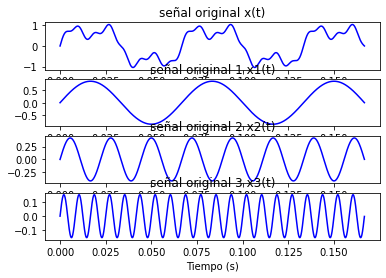

In [11]:


#Graficos

plt.figure(1)
plt.subplot(4,1,1)
plt.plot(t,xt,"b")
plt.title("señal original x(t)") 
plt.subplot(4,1,2)
plt.plot(t,x1,"b")
plt.title("señal original 1 x1(t)") 
plt.subplot(4,1,3)
plt.plot(t,x2,"b")
plt.title("señal original 2 x2(t)") 
plt.subplot(4,1,4)
plt.plot(t,x3,"b")
plt.title("señal original 3 x3(t)") 
plt.xlabel("Tiempo (s)")
plt.show()


In [12]:
#########################################
#                   Muestreo de señal x(t)

# Tamaño de la señal x(t)
L=len(xt)

#Extraer el máximo tiempo del vector de tiempos 
t_max = t[L -1]

In [13]:

"""frecuencia de muestro para observar el muestreo crítico,
 el sobre muestreo y submuestreo"""
fs_new = 1.5*B 

# nuevo número de muestras :
# fs(m/s)-- 1seg
# ?     -- t_max seg
N = int(np.round(t_max*fs_new/1))

In [14]:


#Nuevo vector de tiempos 
tn =np.linspace(0,t_max,N)

#función senoidal 1:
    
xn1 = 0.85*np.sin(2*np.pi*f1*tn)
#función senoidal 2:
    
xn2 = 0.42*np.sin(2*np.pi*f2*tn)

#función senoidal 3:
    
xn3= 0.15*np.sin(2*np.pi*f3*tn)

#suma de senoides 
xn =xn1 + xn2 + xn3

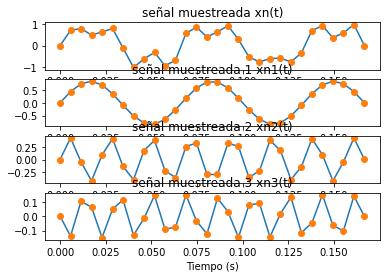

In [15]:

#Graficos
plt.figure(2)
plt.subplot(4,1,1)
plt.plot(tn,xn)
plt.plot(tn,xn,"o")
plt.title("señal muestreada xn(t)") 
plt.subplot(4,1,2)
plt.plot(tn,xn1)
plt.plot(tn,xn1,"o")
plt.title("señal muestreada 1 xn1(t)") 
plt.subplot(4,1,3)
plt.plot(tn,xn2)
plt.plot(tn,xn2,"o")
plt.title("señal muestreada 2 xn2(t)") 
plt.subplot(4,1,4)
plt.plot(tn,xn3)
plt.plot(tn,xn3,"o")
plt.title("señal muestreada 3 xn3(t)") 
plt.xlabel("Tiempo (s)")
plt.show()

0 [0.00000000e+00 6.28318531e-02 1.25663706e-01 ... 9.40592840e+01
 9.41221159e+01 9.41849478e+01]
1 [-3.14159265 -3.0787608  -3.01592895 ... 90.91769139 90.98052325
 91.0433551 ]
2 [-6.28318531 -6.22035345 -6.1575216  ... 87.77609874 87.83893059
 87.90176245]
3 [-9.42477796 -9.36194611 -9.29911425 ... 84.63450609 84.69733794
 84.76016979]
4 [-12.56637061 -12.50353876 -12.44070691 ...  81.49291343  81.55574529
  81.61857714]
5 [-15.70796327 -15.64513141 -15.58229956 ...  78.35132078  78.41415263
  78.47698449]
6 [-18.84955592 -18.78672407 -18.72389222 ...  75.20972813  75.27255998
  75.33539183]
7 [-21.99114858 -21.92831672 -21.86548487 ...  72.06813547  72.13096733
  72.19379918]
8 [-25.13274123 -25.06990938 -25.00707752 ...  68.92654282  68.98937467
  69.05220653]
9 [-28.27433388 -28.21150203 -28.14867018 ...  65.78495017  65.84778202
  65.91061387]
10 [-31.41592654 -31.35309468 -31.29026283 ...  62.64335751  62.70618937
  62.76902122]
11 [-34.55751919 -34.49468734 -34.43185548 ...  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


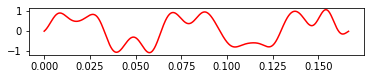

In [24]:

###############################################
#             Reconstrucción de la señal
#Periodo de muestreo 
ts_new=1/fs_new
#factor de tiempo
d=50
#incremento de tiempo
dt = ts_new/d

#vector de tiempos
step=0.001 
tr = np.arange(0,t_max,dt)
#Vector para la señal x(t) reconstruida
xr=np.zeros(len(tr))
#Evalua la ecuación de whittaker-shannon
#por la sumatoria se pondra el for
for n in range(0,N):
    arg = np.pi*(fs_new*tr -n)
    print(n,arg)
    #if n!=50 or n!=100:
    xr = xr + xn[n]*np.sin(arg)/arg
    #else:
        #xr = xr + xn[n]
        
for n in range(0,N):
    xr[n*d]= xn[n]
  
#Gráfico
plt.figure(1)
plt.subplot(4,1,1)
plt.plot(tr,xr,"r")
plt.show()


In [17]:
############################################################################
#Interpolación Spline cúbico natural
    
#dominio donde tiene sentido la interpolación 

ti=np.linspace(0,t_max,1001)


xc=InterpolatedUnivariateSpline(tn,xn,k=3)(ti)
xc1=InterpolatedUnivariateSpline(tn,xn1,k=3)(ti)
xc2=InterpolatedUnivariateSpline(tn,xn2,k=3)(ti)
xc3=InterpolatedUnivariateSpline(tn,xn3,k=3)(ti)

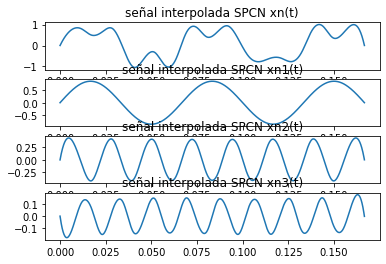

'plt.figure(1)\nplt.subplot(4,1,1)\nplt.plot(ti,xc,"green")\nplt.show()'

In [18]:
#Figuras de la interpolació cúbica natural
plt.figure(3)
plt.subplot(4,1,1)
plt.plot(ti,xc)
plt.title("señal interpolada SPCN xn(t)") 
plt.subplot(4,1,2)
plt.plot(ti,xc1)
plt.title("señal interpolada SPCN xn1(t)") 
plt.subplot(4,1,3)
plt.plot(ti,xc2)
plt.title("señal interpolada SPCN xn2(t)") 
plt.subplot(4,1,4)
plt.plot(ti,xc3)
plt.title("señal interpolada SPCN xn3(t)") 
plt.show()

"""plt.figure(1)
plt.subplot(4,1,1)
plt.plot(ti,xc,"green")
plt.show()"""

In [19]:
###############################################
#Interpolación polinomial 

tin=np.linspace(0,t_max,1000)

"""xp=xn
xp1=xn1
xp2=xn2
xp3=xn3"""



xp=barycentric_interpolate(tn, xn, tin)
xp1=barycentric_interpolate(tn, xn1, tin)
xp2=barycentric_interpolate(tn, xn2, tin)
xp3=barycentric_interpolate(tn, xn3, tin)

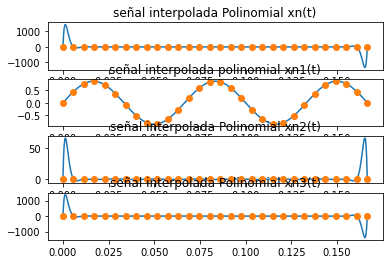

In [20]:
#Interpolación polinomial 

plt.figure(4)
plt.subplot(4,1,1)
plt.plot(tin,xp)
plt.plot(tn,xn,"o")
plt.title("señal interpolada Polinomial xn(t)") 
plt.subplot(4,1,2)
plt.plot(tin,xp1)
plt.plot(tn,xn1,"o")
plt.title("señal interpolada polinomial xn1(t)") 
plt.subplot(4,1,3)
plt.plot(tin,xp2)
plt.plot(tn,xn2,"o")
plt.title("señal interpolada Polinomial xn2(t)") 
plt.subplot(4,1,4)
plt.plot(tin,xp3)
plt.plot(tn,xn3,"o")
plt.title("señal interpolada Polinomial xn3(t)") 
plt.show()


In [21]:
################################################
#Interpolación cuadratica 

xs=InterpolatedUnivariateSpline(tn,xn,k=2)(ti)
xs1=InterpolatedUnivariateSpline(tn,xn1,k=2)(ti)
xs2=InterpolatedUnivariateSpline(tn,xn2,k=2)(ti)
xs3=InterpolatedUnivariateSpline(tn,xn3,k=2)(ti)

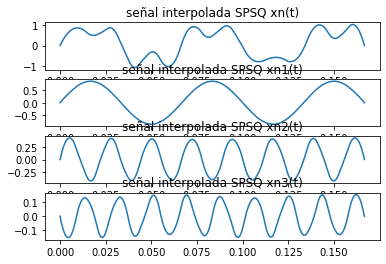

In [22]:
plt.figure(5)
plt.subplot(4,1,1)
plt.plot(ti,xs)
plt.title("señal interpolada SPSQ xn(t)") 
plt.subplot(4,1,2)
plt.plot(ti,xs1)
plt.title("señal interpolada SPSQ xn1(t)") 
plt.subplot(4,1,3)
plt.plot(ti,xs2)
plt.title("señal interpolada SPSQ xn2(t)") 
plt.subplot(4,1,4)
plt.plot(ti,xs3)
plt.title("señal interpolada SPSQ xn3(t)") 
plt.show()

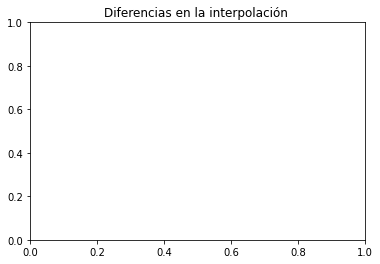

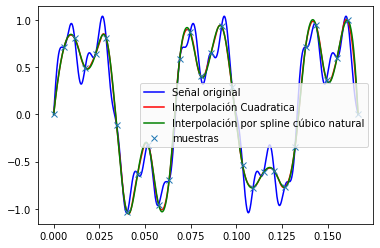

In [27]:
#Diferencias entre interpolaciones 

plt.title("Diferencias en la interpolación ")
plt.figure(6)
plt.subplot(1,1,1)
plt.plot(t,xt,"b")
plt.plot(ti,xs,"red")
plt.plot(ti,xc,"green")
plt.plot(tn,xn,"x")
leg=plt.legend(["Señal original","Interpolación Cuadratica","Interpolación por spline cúbico natural","muestras"])
leg.get_frame().set_facecolor("#fafafa")
plt.show()
